<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module3/Projects/HeartDiseasePrediction/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart disease remains a leading global health concern, contributing significantly to morbidity and mortality rates. Early detection and risk assessment are crucial in preventing severe complications and improving patient outcomes. Machine learning offers a powerful approach to analyzing medical data and predicting heart disease risk based on various clinical and lifestyle factors.

This project utilizes the [Cleaveland dataset](https://drive.google.com/file/d/1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN/view) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/datasets), a widely used dataset in cardiovascular research. The dataset contains clinical attributes such as age, sex, blood pressure, cholesterol levels, chest pain type, and electrocardiogram (ECG) results, which can help identify patterns indicative of heart disease.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Data processing

##Load data

In [2]:
#This dataset doesn't have headers
df = pd.read_csv('cleveland.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

df ['target'] = df.target.map ({0: 0 , 1: 1 , 2: 1 , 3: 1 , 4: 1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Check for NaN

In [4]:
for col in df.columns:
  print(f'{col}: {df[col].isnull().sum()}')

age: 0
sex: 0
cp: 0
trestbps: 0
chol: 0
fbs: 0
restecg: 0
thalach: 0
exang: 0
oldpeak: 0
slope: 0
ca: 4
thal: 2
target: 0


Fill the Nan

In [5]:
df ['thal'] = df.thal.fillna(df.thal.mean())
df ['ca'] = df.thal.fillna(df.ca.mean())

##Visualize the data

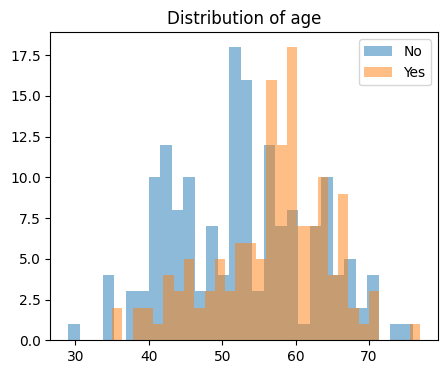

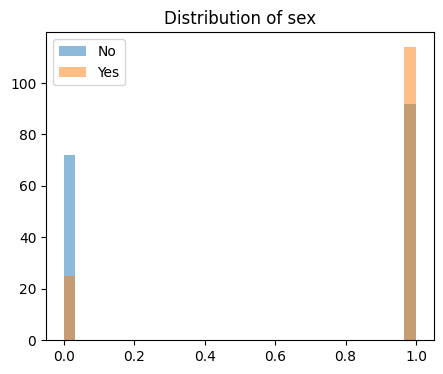

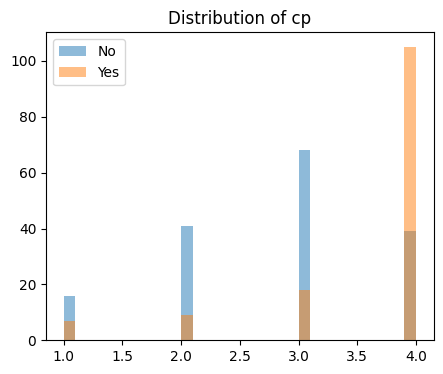

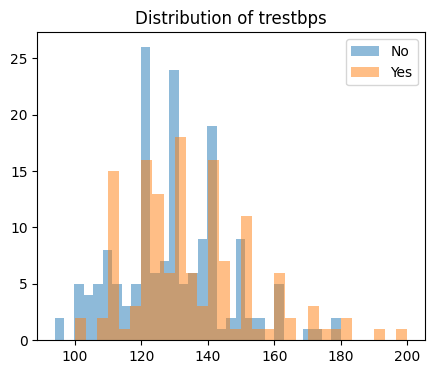

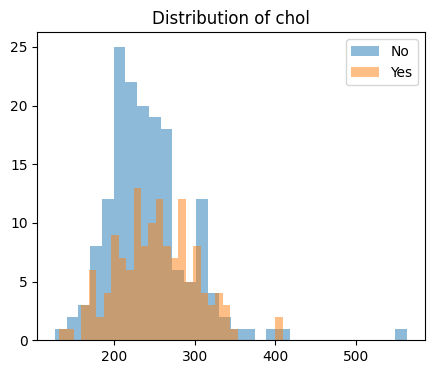

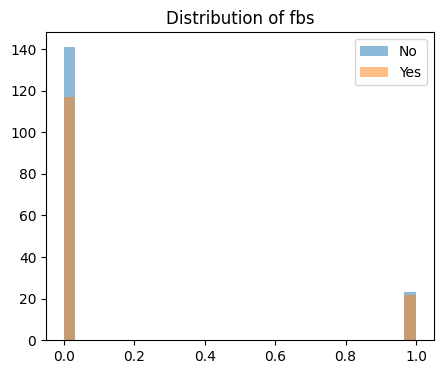

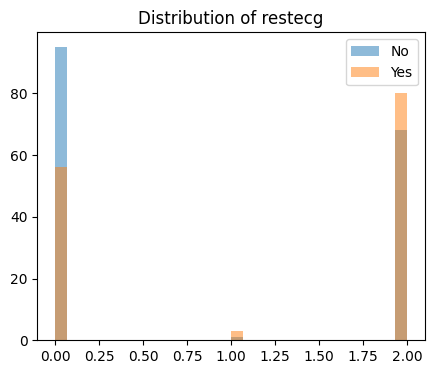

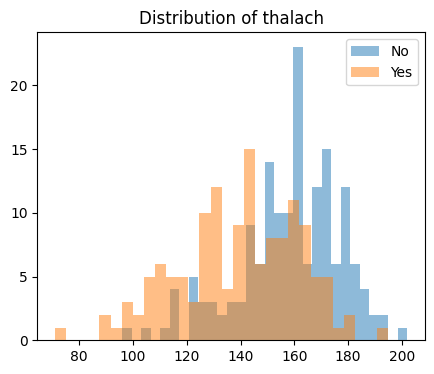

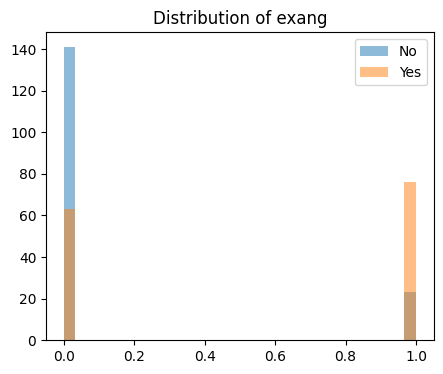

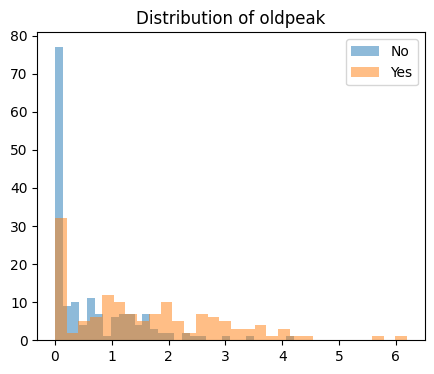

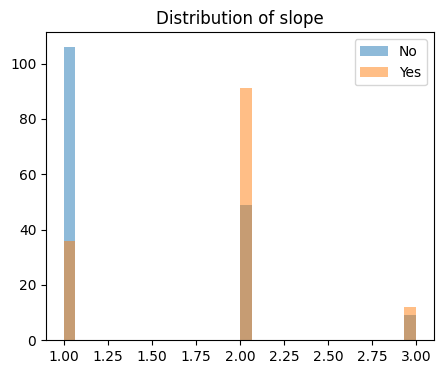

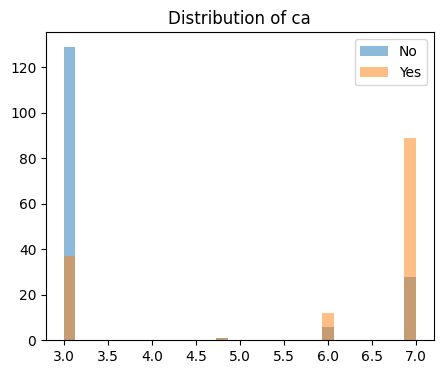

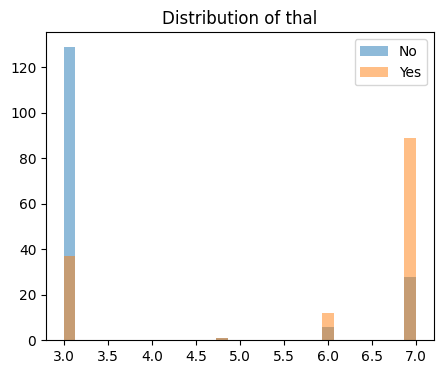

In [6]:
#Visualize the distribution of each category to target
#Using histogram
for col in df.drop(columns = ['target']).columns:
  plt.figure(figsize=(5,4))
  plt.hist(df[df['target']==0][col], bins=30, alpha=0.5, label='No')
  plt.hist(df[df['target']==1][col], bins=30, alpha=0.5, label='Yes')
  plt.title(f'Distribution of {col}')
  plt.legend()
  plt.show()


##Split the data

In [7]:
X,y = df.drop(columns = ['target']), df.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

#Train the model

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [9]:
df_conclusion = pd.DataFrame(columns = ['Model', 'Accuracy Train',
                                        'Accuracy Test', 'Precision',
                                        'Recall', 'F1 Score'])
df_conclusion.set_index('Model', inplace = True)

##KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5,
                                      weights = 'uniform',
                                      algorithm = 'auto',
                                      leaf_size = 30,
                                      p = 2,
                                      metric='minkowski')

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
accuracy_train = accuracy_score(y_train, knn_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, knn_classifier.predict(X_test))
precision = precision_score(y_test, knn_classifier.predict(X_test))
recall = recall_score(y_test, knn_classifier.predict(X_test))
f1 = f1_score(y_test, knn_classifier.predict(X_test))

df_conclusion.loc['KNN'] = [accuracy_train, accuracy_test, precision, recall, f1]

print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy Train: 0.768595041322314
Accuracy Test: 0.6721311475409836
Precision: 0.7307692307692307
Recall: 0.59375
F1 Score: 0.6551724137931034


##SVM

In [12]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf',
                     random_state = 42)

svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [13]:
accuracy_train = accuracy_score(y_train, svm_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, svm_classifier.predict(X_test))

precision = precision_score(y_test, svm_classifier.predict(X_test))
recall = recall_score(y_test, svm_classifier.predict(X_test))
f1 = f1_score(y_test, svm_classifier.predict(X_test))

df_conclusion.loc['SVM'] = [accuracy_train, accuracy_test, precision, recall, f1]

print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy Train: 0.6611570247933884
Accuracy Test: 0.6721311475409836
Precision: 0.8333333333333334
Recall: 0.46875
F1 Score: 0.6


##Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
accuracy_train = accuracy_score(y_train, nb_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, nb_classifier.predict(X_test))

precision = precision_score(y_test, nb_classifier.predict(X_test))
recall = recall_score(y_test, nb_classifier.predict(X_test))
f1 = f1_score(y_test, nb_classifier.predict(X_test))

df_conclusion.loc['Naive Bayes'] = [accuracy_train, accuracy_test, precision, recall, f1]

print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy Train: 0.8099173553719008
Accuracy Test: 0.8852459016393442
Precision: 0.9032258064516129
Recall: 0.875
F1 Score: 0.8888888888888888


##Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='gini',
                                       max_depth=10,
                                       min_samples_split=2)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [17]:
accuracy_train = accuracy_score(y_train, dt_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, dt_classifier.predict(X_test))

precision = precision_score(y_test, dt_classifier.predict(X_test))
recall = recall_score(y_test, dt_classifier.predict(X_test))
f1 = f1_score(y_test, dt_classifier.predict(X_test))

df_conclusion.loc['Decision Tree'] = [accuracy_train, accuracy_test, precision, recall, f1]

print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy Train: 1.0
Accuracy Test: 0.819672131147541
Precision: 0.8620689655172413
Recall: 0.78125
F1 Score: 0.819672131147541


##Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion='gini',
                                       max_depth = 10,
                                       min_samples_split = 2,
                                       n_estimators=10,
                                       random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [19]:
accuracy_train = accuracy_score(y_train, rf_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, rf_classifier.predict(X_test))

precision = precision_score(y_test, rf_classifier.predict(X_test))
recall = recall_score(y_test, rf_classifier.predict(X_test))
f1 = f1_score(y_test, rf_classifier.predict(X_test))

df_conclusion.loc['Random Forest'] = [accuracy_train, accuracy_test, precision, recall, f1]

print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy Train: 0.9834710743801653
Accuracy Test: 0.8360655737704918
Precision: 0.9230769230769231
Recall: 0.75
F1 Score: 0.8275862068965517


##Ada Boost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ab_classifier = AdaBoostClassifier(n_estimators=50,
                                  learning_rate =1.0)

ab_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [21]:
accuracy_train = accuracy_score(y_train, ab_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, ab_classifier.predict(X_test))

precision = precision_score(y_test, ab_classifier.predict(X_test))
recall = recall_score(y_test, ab_classifier.predict(X_test))
f1 = f1_score(y_test, ab_classifier.predict(X_test))

df_conclusion.loc['Ada Boost'] = [accuracy_train, accuracy_test, precision, recall, f1]

print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy Train: 0.8925619834710744
Accuracy Test: 0.8032786885245902
Precision: 0.8333333333333334
Recall: 0.78125
F1 Score: 0.8064516129032258


##Gradient Boost

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(learning_rate=0.1,
                              n_estimators=100,
                              subsample=1.0,
                              min_samples_split=2,
                              max_depth=3,
                              random_state=42)

gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [23]:
accuracy_train = accuracy_score(y_train, gb_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, gb_classifier.predict(X_test))

precision = precision_score(y_test, gb_classifier.predict(X_test))
recall = recall_score(y_test, gb_classifier.predict(X_test))
f1 = f1_score(y_test, gb_classifier.predict(X_test))

df_conclusion.loc['Gradient Boost'] = [accuracy_train, accuracy_test, precision, recall, f1]

print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy Train: 0.9958677685950413
Accuracy Test: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.8125
F1 Score: 0.8253968253968254


##XGBoost

In [25]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [26]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(objective="binary:logistic",
                               random_state=42,
                               n_estimators = 100)

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [27]:
accuracy_train = accuracy_score(y_train, xgb_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, xgb_classifier.predict(X_test))

precision = precision_score(y_test, xgb_classifier.predict(X_test))
recall = recall_score(y_test, xgb_classifier.predict(X_test))
f1 = f1_score(y_test, xgb_classifier.predict(X_test))

df_conclusion.loc['XGBoost'] = [accuracy_train, accuracy_test, precision, recall, f1_score]

print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy Train: 1.0
Accuracy Test: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375


##Stacking

In [30]:
from sklearn.ensemble import StackingClassifier

dtc = DecisionTreeClassifier ( random_state =42)
rfc = RandomForestClassifier ( random_state =42)
knn = KNeighborsClassifier ()
xgb = XGBClassifier ( )
gc = GradientBoostingClassifier ( random_state =42)
svc = SVC ( kernel = 'rbf', random_state =42)
ad = AdaBoostClassifier ( random_state =42)

stacking_classifier = StackingClassifier ( estimators = [('dtc', dtc),
                                                       ('rfc', rfc),
                                                       ('knn', knn),
                                                       ('xgb', xgb),
                                                       ('gc', gc),
                                                       ('svc', svc),
                                                       ('ad', ad)],
                                            final_estimator = xgb)

stacking_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=Fa...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [31]:
accuracy_train = accuracy_score(y_train, stacking_classifier.predict(X_train))
accuracy_test = accuracy_score(y_test, stacking_classifier.predict(X_test))

precision = precision_score(y_test, stacking_classifier.predict(X_test))
recall = recall_score(y_test, stacking_classifier.predict(X_test))
f1 = f1_score(y_test, stacking_classifier.predict(X_test))

df_conclusion.loc['Stacking'] = [accuracy_train, accuracy_test, precision, recall, f1_score]

print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy Train: 0.9256198347107438
Accuracy Test: 0.7704918032786885
Precision: 0.8
Recall: 0.75


#Conclusion

In [32]:
df_conclusion

,Accuracy Train,Accuracy Test,Precision,Recall,F1 Score
Model,,,,,
KNN,0.768595,0.672131,0.730769,0.59375,0.655172
SVM,0.661157,0.672131,0.833333,0.46875,0.6
Naive Bayes,0.809917,0.885246,0.903226,0.87500,0.888889
Decision Tree,1.000000,0.819672,0.862069,0.78125,0.819672
Random Forest,0.983471,0.836066,0.923077,0.75000,0.827586
Ada Boost,0.892562,0.803279,0.833333,0.78125,0.806452
Gradient Boost,0.995868,0.819672,0.838710,0.81250,0.825397
XGBoost,1.000000,0.836066,0.843750,0.84375,<function f1_score at 0x7b338988eca0>
Stacking,0.925620,0.770492,0.800000,0.75000,<function f1_score at 0x7b338988eca0>
